In [13]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [14]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [15]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [16]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_bold"
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=20) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        #p = p + theme(plot.margin=unit(c(-0.5,1,1,1),"cm"))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [17]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F, ymax=None ,ymin=None) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        print(min(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=ymin, ymax=ymax)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  +
                                    annotate('text', 
                                             x=ncol(submotif), 
                                             y=max(submotif), 
                                             size=4,
                                             label=sprintf("%.2f",as.numeric(textn))
                                             )
        #theme(plot.margin = unit(c(0,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] 0.013521
[1] -0.000891


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.011641
[1] -0.000785


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.013149
[1] -0.001111


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.010397
[1] -0.000785


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.006589
[1] -0.000379


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.01147
[1] -0.00198


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


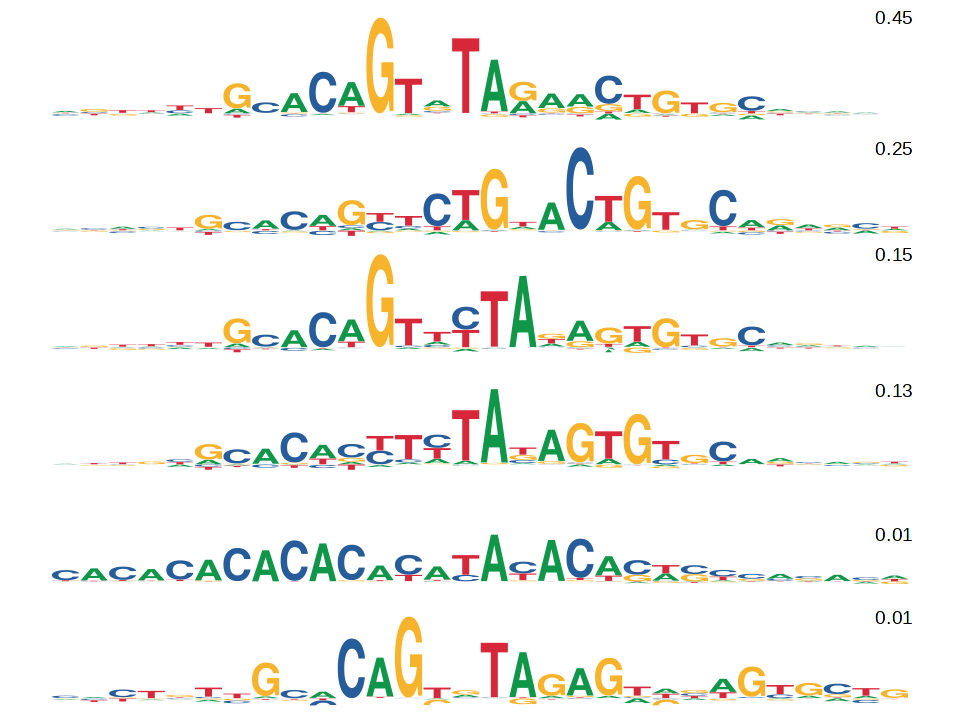

In [21]:

options(repr.plot.width = 8, repr.plot.height = 6)

atac_annotations = read.table("bias_motifs/profile_tn5.counts.csv",sep=",", header=TRUE)

all_plots = get_plots("bias_motifs/profile_0_%d_tn5.pfm", seq(0,5), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.014, ymin=-0.001)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=1)

ggsave("bias_motifs/ATAC/tn5_bias.pdf", device = "pdf",  width = 8, height = 6, dpi = 300)


In [22]:
options(repr.plot.width = 8, repr.plot.height = 1)

submotif = read_nptxt_matrix("bias_motifs/ATAC//profile_0_30_tn5.pfm")

rownames(submotif) = c("A","C","G","T")

f="helvetica_bold"
p <- ggseqlogo(submotif, method='bits', font=f, size=10) +
                                theme_void() 
ggsave("bias_motifs/ATAC/tn5_summary_bias.pdf", device = "pdf",  width = 8, height = 1, dpi = 300)


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.002796
[1] -5.2e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.002848
[1] -5.2e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.002386
[1] -5.3e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.003098
[1] -6.1e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


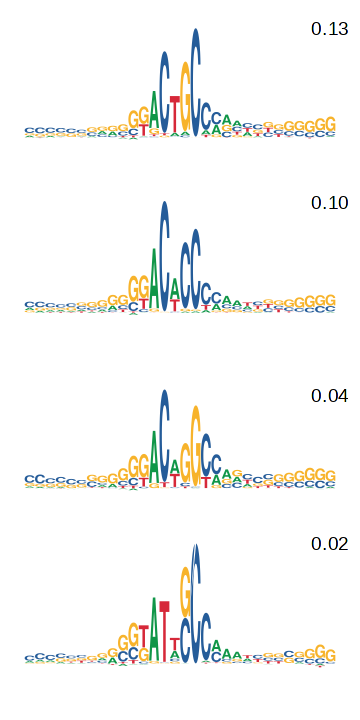

In [12]:

options(repr.plot.width = 3, repr.plot.height = 6)

dnase_annotations = read.table("bias_motifs/profile_dnase.counts.csv",sep=",", header=TRUE)

all_plots1 = get_plots("bias_motifs/profile_0_%d_dnase1.pfm",  c(1,2,8,14), dnase_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F, ymax=0.0031, ymin=-0.001)

#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots1, ncol=1)
ggsave("bias_motifs/DNASE/dnase1_bias.pdf", device = "pdf",  width = 3, height = 5, dpi = 300)


In [12]:
#options(repr.plot.width = 8, repr.plot.height = 9)

#wrap_plots(wrap_plots(all_plots,ncol=1),
#          wrap_plots(all_plots1, ncol=1),
#           ncol=1
#           )
